## 스탯캐스트 사용 용어 정리
- Exit Velocity (EV / mph) : 타구 속도
- Barrels : 타구속도와 발사각도가 완벽하게 조합된 타구 (98마일 이상의 타구속도와 26-30도 사이의 발사각 / 타구속도(1mph)에 따라 발사각(2~3도) 확장)
- Sweet Spot : 발사각도가 8도에서 32도 사이인 타구
- Pitch Velocity (mph) : 투구 속도
- Active Spin : 움직임에 기여하는 회전
- Extension : 발 끝이 마운드에서 얼마나 멀리 떨어졌는지 (투수의 스탠스(보폭)의 넓이)
- Arm Strength : 야수의 송구속도
- Distance Covered : 야수 또는 주자의 거리(?)
- Jump : (외야수비) 가장 빠른 반응과 직접적인 경로를 가지고 있는지를 보여주는 지표
- Catch Probabillity : (외야수비) 타구를 잡은 확률
- Expected Weighted On-base Average (xwOBA) : 타구속도, 발사각 및 특정유형의 타구의 스프린트 속도 사용하여 공식화
- Sprint Speed(/fps) : 선수의 최고 달리기속도 (초당피트)
- Launch Angle(LA) : 타구 발사각도
- Hard Hit : 타구속도가 95mph 이상인 타구
- Batted Ball Event (BBE) : 타격이벤트(타구를 쳐서 결과가 발생했을 때)가 발생한 모든 타구
- Pitch Movement : 투구의 움직임(공의 움직임), 원 수치와 평균에 대한 수치로 정의
- Spin Rate : 투구의 회전속도 (분당 회전수)
- Pop Time : 포수가 공을 빼내는 속도
- Base-to-base Time : 한 베이스에서 다른 베이스로 이동하는데 걸리는 시간 (초)
- Lead Distance : 주자의 리드폭 (피트)
- Outs Above Average (OAA) : 수비 성공 확률 / 평균 대비 얼마나 많은 아웃을 잡아내는지
- Expected Batting Average (xBA) : 타구가 안타가 될 가능성
- Expected Earned Run Avg (xERA) : xwOBA의 1:1변환으로, 평균자책점(ERA) 척도로 변환
- Bolt : 주자의 Sprint Speed가 30피트/초 이상인 것
- Batted Ball Distance (DST) : 타구가 뻗어간 길이, 타구가 착지한 곳까지의 길이
- Projected Home Run Distance : 홈런의 예상 타구거리, 장애물이 없을 경우 홈런의 거리

---

# Exit Velocity (EV)
- 타자가 타격한 직후 공의 속도 측정
- 모든 타격 (아웃, 안타, 오류 등)에 대해 추적
- 높은 EV는 수비의 반응할 시간을 비교적 적게 하므로 안타확률 높음

## 칼럼 설명
- attempts : 타구이벤트가 발생한 타석 수 (BBE)
- avg_hit_angle : 평균 타구발사각
- anglesweetspotpercent : 발사각도가 8도에서 32도 사이인 타구의 비율
- max_hit_speed : 최고 타구속도
- avg_hit_speed : 평균 타구속도
- fbld(FD/LD) : 뜬공과 라인드라이브 타구의 평균 타구속도
- gb : 땅볼 타구의 평균 타구속도
- max_distance : 최장 타구거리
- avg_distance : 평균 타구거리
- avg_hr_distance : 평균 홈런타구거리
- ev95plust : HardHit(타구속도 95마일 이상) 개수
- ev95per-swing : 스윙 당 HardHit 비율
- ev95percent : HardHit 비율
- barrels : 배럴타구를 만들어낸 횟수
- brl_percent : BBE 당 배럴타구 비율
- brl_pa : 타석 당 배럴타구 비율

## 홈런과 EV관련 지표들과의 상관관계 분석

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### 데이터 확인
- ev_df : Exit_velocity 관련 지표들의 데이터프레임
- hr_df : 홈런 개수가 기록된 데이터프레임

In [2]:
ev_df = pd.read_csv('./data/exit_velocity.csv')
hr_df = pd.read_csv('./data/stats.csv')
ev_df.head()

,last_name,first_name,player_id,attempts,avg_hit_angle,anglesweetspotpercent,max_hit_speed,avg_hit_speed,fbld,gb,max_distance,avg_distance,avg_hr_distance,ev95plus,ev95per-swing,ev95percent,barrels,brl_percent,brl_pa
0,Ohtani,Shohei,660271,162,16.2,35.8,119.0,94.1,101.2,86.1,470,201,417.0,93,17.4,57.4,40.0,24.7,14.5
1,Acuña Jr.,Ronald,660670,181,19.4,38.7,117.2,94.0,97.7,89.4,481,203,413.0,102,20.8,56.4,36.0,19.9,12.1
2,Tatis Jr.,Fernando,665487,144,11.6,33.3,115.9,92.7,99.6,86.4,477,178,421.0,78,16.8,54.2,29.0,20.1,12.1
3,Devers,Rafael,646240,190,9.4,35.3,114.4,93.3,99.3,89.1,452,175,417.0,109,17.6,57.4,34.0,17.9,11.6
4,Cruz,Nelson,443558,175,9.3,31.4,116.6,93.1,98.3,89.6,457,168,414.0,95,19.6,54.3,29.0,16.6,11.2


In [3]:
hr_df.head()

,last_name,first_name,player_id,year,b_home_run,Unnamed: 5
0,Cruz Jr.,Nelson,443558,2021,16,NaN
1,Peralta,David,444482,2021,4,NaN
2,Blackmon,Charlie,453568,2021,4,NaN
3,McCutchen,Andrew,457705,2021,12,NaN
4,Upton,Justin,457708,2021,14,NaN


In [4]:
ev_df.describe()

,player_id,attempts,avg_hit_angle,anglesweetspotpercent,max_hit_speed,avg_hit_speed,fbld,gb,max_distance,avg_distance,avg_hr_distance,ev95plus,ev95per-swing,ev95percent,barrels,brl_percent,brl_pa
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,125.000000,127.000000,127.000000,127.000000,126.000000,127.000000,127.000000
mean,598599.433071,190.094488,12.406299,34.651969,111.352756,89.737795,93.899213,86.486614,433.062992,168.645669,400.232000,79.700787,15.714173,42.181102,17.309524,9.293701,6.177953
std,63816.782820,25.590621,4.680909,4.617304,2.976331,2.146682,2.605016,2.707613,21.987279,20.065578,12.133755,15.706290,2.907017,7.408786,7.338081,4.367480,2.636915
min,443558.000000,138.000000,-1.600000,22.900000,104.600000,82.500000,83.500000,79.600000,356.000000,108.000000,353.000000,37.000000,9.100000,15.500000,2.000000,0.000000,0.000000
25%,550991.000000,170.500000,9.350000,32.100000,109.450000,88.350000,92.400000,84.400000,418.500000,155.000000,393.000000,68.000000,13.750000,37.300000,13.000000,6.300000,4.450000
50%,608324.000000,189.000000,12.900000,34.700000,110.900000,89.500000,93.900000,86.300000,435.000000,170.000000,402.000000,79.000000,15.500000,42.600000,18.000000,9.000000,6.200000
75%,656665.000000,207.000000,15.300000,37.900000,113.450000,91.150000,95.450000,88.500000,446.000000,182.500000,408.000000,90.500000,17.550000,47.100000,21.000000,11.950000,7.700000
max,670541.000000,260.000000,24.400000,46.900000,119.000000,96.500000,101.200000,94.000000,485.000000,214.000000,439.000000,115.000000,24.400000,58.500000,40.000000,24.700000,14.500000


In [5]:
hr_df.describe()

,player_id,year,b_home_run,Unnamed: 5
count,142.000000,142.0,142.000000,0.0
mean,598273.852113,2021.0,9.838028,NaN
std,62073.180044,0.0,4.961751,NaN
min,443558.000000,2021.0,0.000000,NaN
25%,570544.250000,2021.0,6.000000,NaN
50%,606710.500000,2021.0,9.000000,NaN
75%,656492.500000,2021.0,13.000000,NaN
max,670541.000000,2021.0,23.000000,NaN


In [6]:
print(ev_df.columns, hr_df.columns)

Index(['last_name', ' first_name', 'player_id', 'attempts', 'avg_hit_angle',
       'anglesweetspotpercent', 'max_hit_speed', 'avg_hit_speed', 'fbld', 'gb',
       'max_distance', 'avg_distance', 'avg_hr_distance', 'ev95plus',
       'ev95per-swing', 'ev95percent', 'barrels', 'brl_percent', 'brl_pa'],
      dtype='object') Index(['last_name', ' first_name', 'player_id', 'year', 'b_home_run',
       'Unnamed: 5'],
      dtype='object')


### 필요없는 칼럼제거 (player_id와 홈런 갯수만 사용)
- player_id는 ev_df와 merge하기 위한 key로 남겨둠

In [7]:
hr_df = hr_df.drop(['Unnamed: 5', 'last_name', ' first_name', 'year'], axis=1)
hr_df.columns

Index(['player_id', 'b_home_run'], dtype='object')

### ev_df와 hr_df merge

In [8]:
ev_hr = pd.merge(ev_df, hr_df, how = 'outer', on='player_id')
ev_hr.head()

,last_name,first_name,player_id,attempts,avg_hit_angle,anglesweetspotpercent,max_hit_speed,avg_hit_speed,fbld,gb,max_distance,avg_distance,avg_hr_distance,ev95plus,ev95per-swing,ev95percent,barrels,brl_percent,brl_pa,b_home_run
0,Ohtani,Shohei,660271,162.0,16.2,35.8,119.0,94.1,101.2,86.1,470.0,201.0,417.0,93.0,17.4,57.4,40.0,24.7,14.5,23
1,Acuña Jr.,Ronald,660670,181.0,19.4,38.7,117.2,94.0,97.7,89.4,481.0,203.0,413.0,102.0,20.8,56.4,36.0,19.9,12.1,20
2,Tatis Jr.,Fernando,665487,144.0,11.6,33.3,115.9,92.7,99.6,86.4,477.0,178.0,421.0,78.0,16.8,54.2,29.0,20.1,12.1,22
3,Devers,Rafael,646240,190.0,9.4,35.3,114.4,93.3,99.3,89.1,452.0,175.0,417.0,109.0,17.6,57.4,34.0,17.9,11.6,18
4,Cruz,Nelson,443558,175.0,9.3,31.4,116.6,93.1,98.3,89.6,457.0,168.0,414.0,95.0,19.6,54.3,29.0,16.6,11.2,16


In [9]:
ev_hr.describe()

,player_id,attempts,avg_hit_angle,anglesweetspotpercent,max_hit_speed,avg_hit_speed,fbld,gb,max_distance,avg_distance,avg_hr_distance,ev95plus,ev95per-swing,ev95percent,barrels,brl_percent,brl_pa,b_home_run
count,142.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,125.000000,127.000000,127.000000,127.000000,126.000000,127.000000,127.000000,142.000000
mean,598273.852113,190.094488,12.406299,34.651969,111.352756,89.737795,93.899213,86.486614,433.062992,168.645669,400.232000,79.700787,15.714173,42.181102,17.309524,9.293701,6.177953,9.838028
std,62073.180044,25.590621,4.680909,4.617304,2.976331,2.146682,2.605016,2.707613,21.987279,20.065578,12.133755,15.706290,2.907017,7.408786,7.338081,4.367480,2.636915,4.961751
min,443558.000000,138.000000,-1.600000,22.900000,104.600000,82.500000,83.500000,79.600000,356.000000,108.000000,353.000000,37.000000,9.100000,15.500000,2.000000,0.000000,0.000000,0.000000
25%,570544.250000,170.500000,9.350000,32.100000,109.450000,88.350000,92.400000,84.400000,418.500000,155.000000,393.000000,68.000000,13.750000,37.300000,13.000000,6.300000,4.450000,6.000000
50%,606710.500000,189.000000,12.900000,34.700000,110.900000,89.500000,93.900000,86.300000,435.000000,170.000000,402.000000,79.000000,15.500000,42.600000,18.000000,9.000000,6.200000,9.000000
75%,656492.500000,207.000000,15.300000,37.900000,113.450000,91.150000,95.450000,88.500000,446.000000,182.500000,408.000000,90.500000,17.550000,47.100000,21.000000,11.950000,7.700000,13.000000
max,670541.000000,260.000000,24.400000,46.900000,119.000000,96.500000,101.200000,94.000000,485.000000,214.000000,439.000000,115.000000,24.400000,58.500000,40.000000,24.700000,14.500000,23.000000


In [10]:
ev_hr = ev_hr.dropna()
ev_hr.describe()

,player_id,attempts,avg_hit_angle,anglesweetspotpercent,max_hit_speed,avg_hit_speed,fbld,gb,max_distance,avg_distance,avg_hr_distance,ev95plus,ev95per-swing,ev95percent,barrels,brl_percent,brl_pa,b_home_run
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.00000,125.000000,125.000000
mean,599167.752000,189.656000,12.474400,34.678400,111.401600,89.810400,94.001600,86.520800,433.832000,169.024000,400.232000,80.144000,15.777600,42.45840,17.416000,9.42640,6.264000,10.240000
std,62873.931944,25.410216,4.686905,4.647087,2.968572,2.056101,2.442632,2.711692,20.971846,19.958612,12.133755,15.312184,2.866403,7.03159,7.269228,4.27074,2.565384,4.974775
min,443558.000000,138.000000,-1.600000,22.900000,104.600000,85.100000,87.000000,79.600000,367.000000,108.000000,353.000000,46.000000,9.900000,23.40000,2.000000,0.80000,0.600000,1.000000
25%,553993.000000,170.000000,9.400000,32.200000,109.500000,88.600000,92.500000,84.400000,419.000000,155.000000,393.000000,68.000000,13.800000,37.60000,13.000000,6.40000,4.600000,6.000000
50%,608324.000000,188.000000,13.000000,34.700000,111.000000,89.700000,94.000000,86.400000,435.000000,170.000000,402.000000,79.000000,15.600000,42.60000,18.000000,9.10000,6.200000,10.000000
75%,656555.000000,207.000000,15.500000,37.900000,113.600000,91.200000,95.500000,88.500000,446.000000,183.000000,408.000000,91.000000,17.600000,47.20000,21.000000,12.00000,7.700000,14.000000
max,670541.000000,260.000000,24.400000,46.900000,119.000000,96.500000,101.200000,94.000000,485.000000,214.000000,439.000000,115.000000,24.400000,58.50000,40.000000,24.70000,14.500000,23.000000


### player_id 데이터 타입변경
- 상관관계분석에 포함되지 않게 하기 위함

In [11]:
ev_hr['player_id'] = ev_hr['player_id'].astype({'player_id' : 'str'})
ev_hr.dtypes

last_name                 object
 first_name               object
player_id                 object
attempts                 float64
avg_hit_angle            float64
anglesweetspotpercent    float64
max_hit_speed            float64
avg_hit_speed            float64
fbld                     float64
gb                       float64
max_distance             float64
avg_distance             float64
avg_hr_distance          float64
ev95plus                 float64
ev95per-swing            float64
ev95percent              float64
barrels                  float64
brl_percent              float64
brl_pa                   float64
b_home_run                 int64
dtype: object

### 상관관계 분석
- EV 지표들과 홈런개수와의 상관계수
- 상관계수가 0.4이상인 것만 히트맵에 표시
- Barrels(타구속도와 발사각도가 완벽하게 조합된 타구)과 관련된 지표가 높은 상관관계 보임
- fbld(플라이볼과 라인드라이브타구속도), ev95percent(95마일이상 타구속도 비율)도 눈여겨 볼 만함

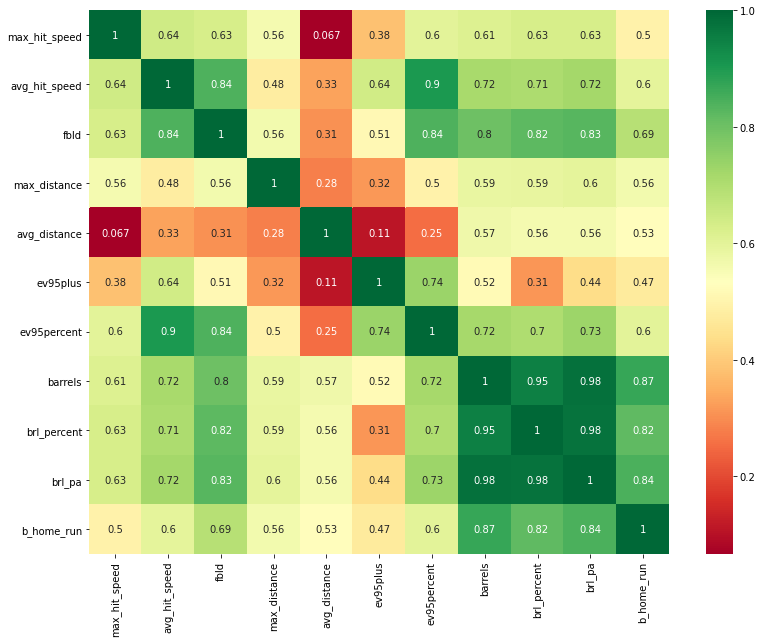

In [13]:
corrmat = ev_hr.corr()
corr_columns = corrmat.index[abs(corrmat["b_home_run"])>=0.4]
plt.figure(figsize=(13,10))
heatmap = sns.heatmap(ev_hr[corr_columns].corr(), annot=True, cmap="RdYlGn")